In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml/Diabetes.csv")

In [5]:
X = df.drop("diabetes", axis=1)
y = df["diabetes"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [7]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


In [9]:
from catboost import CatBoostClassifier

In [10]:
catb_model = CatBoostClassifier().fit(X_train, y_train, verbose=False)

In [11]:
y_pred = catb_model.predict(X_test)

In [12]:
accuracy_score(y_test, y_pred)

0.7532467532467533

**Model Tuning**

In [21]:
catb = CatBoostClassifier(verbose = False)

In [27]:
catb_params = {'learning_rate': [0.01, 0.1, 0.2],
               'iterations': [100, 200],
               'depth': [4, 6, 8]}

In [28]:
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [29]:
catb_cv_model.best_params_

{'depth': 4, 'iterations': 100, 'learning_rate': 0.1}

**Tuned Model**

In [30]:
catb_tuned = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=4).fit(X_train, y_train, verbose=False)

In [31]:
y_pred = catb_tuned.predict(X_test)

In [32]:
accuracy_score(y_test, y_pred)

0.7662337662337663

**Variable Significance Levels**

In [34]:
catb_tuned.get_feature_importance()

array([ 2.97600132, 34.78068442,  4.26845662,  3.72565349,  6.22473937,
       18.87292068,  9.10002857, 20.05151554])

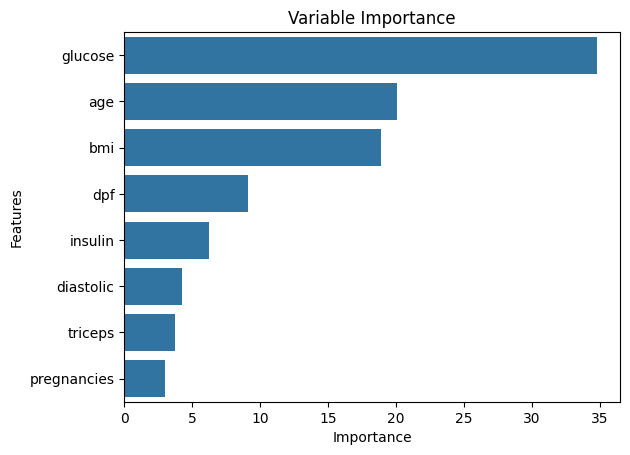

In [35]:
# Önem düzeylerini DataFrame'e çevir ve sıralama yap
feature_importances = pd.DataFrame({"Importance": catb_tuned.feature_importances_},
                                    index=X_train.columns)

# Önem düzeylerini büyükten küçüğe sırala
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Barplot çizimi: x ekseni önem düzeyleri, y ekseni değişken isimleri
sns.barplot(x=feature_importances["Importance"], y=feature_importances.index)

plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Variable Importance")
plt.show()
